In [32]:
import pandas as pd 
from tvDatafeed import TvDatafeed,Interval
import seaborn as sns
import string 
import matplotlib.pyplot as plt

In [33]:
pairs_list= ["USD/CAD","EUR/JPY","EUR/USD","EUR/CHF",
             "USD/CHF","EUR/GBP","GBP/USD","AUD/CAD",
             "NZD/USD","GBP/CHF","AUD/USD","GBP/JPY",
             "USD/JPY","CHF/JPY","EUR/CAD","AUD/JPY",
             "EUR/AUD","AUD/NZD"]
pairs_list = [x.replace("/","") for x in pairs_list]

In [34]:
tv=TvDatafeed()

In [35]:
pair_vals= pd.DataFrame()
for pair in pairs_list:
    data = tv.get_hist(symbol=pair,exchange="OANDA",interval=Interval.in_1_minute,n_bars=10000)
    pair_vals = pd.concat([pair_vals,pd.DataFrame({pair:data["close"]},index=data.index)],axis=1)

In [36]:
pair_vals

,USDCAD,EURJPY,EURUSD,EURCHF,USDCHF,EURGBP,GBPUSD,AUDCAD,NZDUSD,GBPCHF,AUDUSD,GBPJPY,USDJPY,CHFJPY,EURCAD,AUDJPY,EURAUD,AUDNZD
datetime,,,,,,,,,,,,,,,,,,
2024-01-01 21:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.07789
2024-01-01 21:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 00:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 00:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 00:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-09 23:08:00,1.33962,157.791,1.09262,0.93102,0.852100,0.86028,1.270100,0.895400,0.62384,1.082240,0.66843,183.418,144.4140,169.4820,1.46364,96.530,1.634580,1.07158
2024-01-09 23:09:00,1.33942,157.761,1.09270,0.93090,0.851900,0.86026,1.270190,0.895440,0.62393,1.082110,0.66852,183.387,144.3740,169.4720,1.46360,96.520,1.634500,1.07156
2024-01-09 23:10:00,1.33920,157.768,1.09294,0.93096,0.851800,0.86027,1.270460,0.895480,0.62408,1.082160,0.66866,183.391,144.3490,169.4720,1.46362,96.526,1.634500,1.07154


In [51]:
corr_df = pair_vals.corr(method="pearson")

In [58]:
corr_df[(corr_df>0.80) | (corr_df<-0.80)]

,USDCAD,EURJPY,EURUSD,EURCHF,USDCHF,EURGBP,GBPUSD,AUDCAD,NZDUSD,GBPCHF,AUDUSD,GBPJPY,USDJPY,CHFJPY,EURCAD,AUDJPY,EURAUD,AUDNZD
USDCAD,1.000000,NaN,-0.803744,NaN,NaN,NaN,NaN,-0.842922,-0.914797,NaN,-0.955739,NaN,0.805066,NaN,NaN,NaN,NaN,NaN
EURJPY,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.849133,NaN,0.828722,NaN,0.977718,0.950162,0.979899,NaN,0.873340,0.885074,NaN
EURUSD,-0.803744,NaN,1.000000,NaN,-0.866776,NaN,NaN,NaN,0.829672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURCHF,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCHF,NaN,NaN,-0.866776,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURGBP,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-0.896275,NaN,-0.887681,NaN,-0.824168,NaN,NaN,NaN,0.884044
GBPUSD,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDCAD,-0.842922,-0.849133,NaN,NaN,NaN,NaN,NaN,1.000000,0.873463,NaN,0.963738,-0.856514,-0.931429,-0.836437,NaN,NaN,-0.920335,0.844132
NZDUSD,-0.914797,NaN,0.829672,NaN,NaN,NaN,NaN,0.873463,1.000000,NaN,0.930944,NaN,-0.807695,NaN,NaN,NaN,NaN,NaN
GBPCHF,NaN,0.828722,NaN,NaN,NaN,-0.896275,NaN,NaN,NaN,1.000000,NaN,0.895701,0.818938,NaN,NaN,NaN,0.825984,-0.853096


<AxesSubplot: >

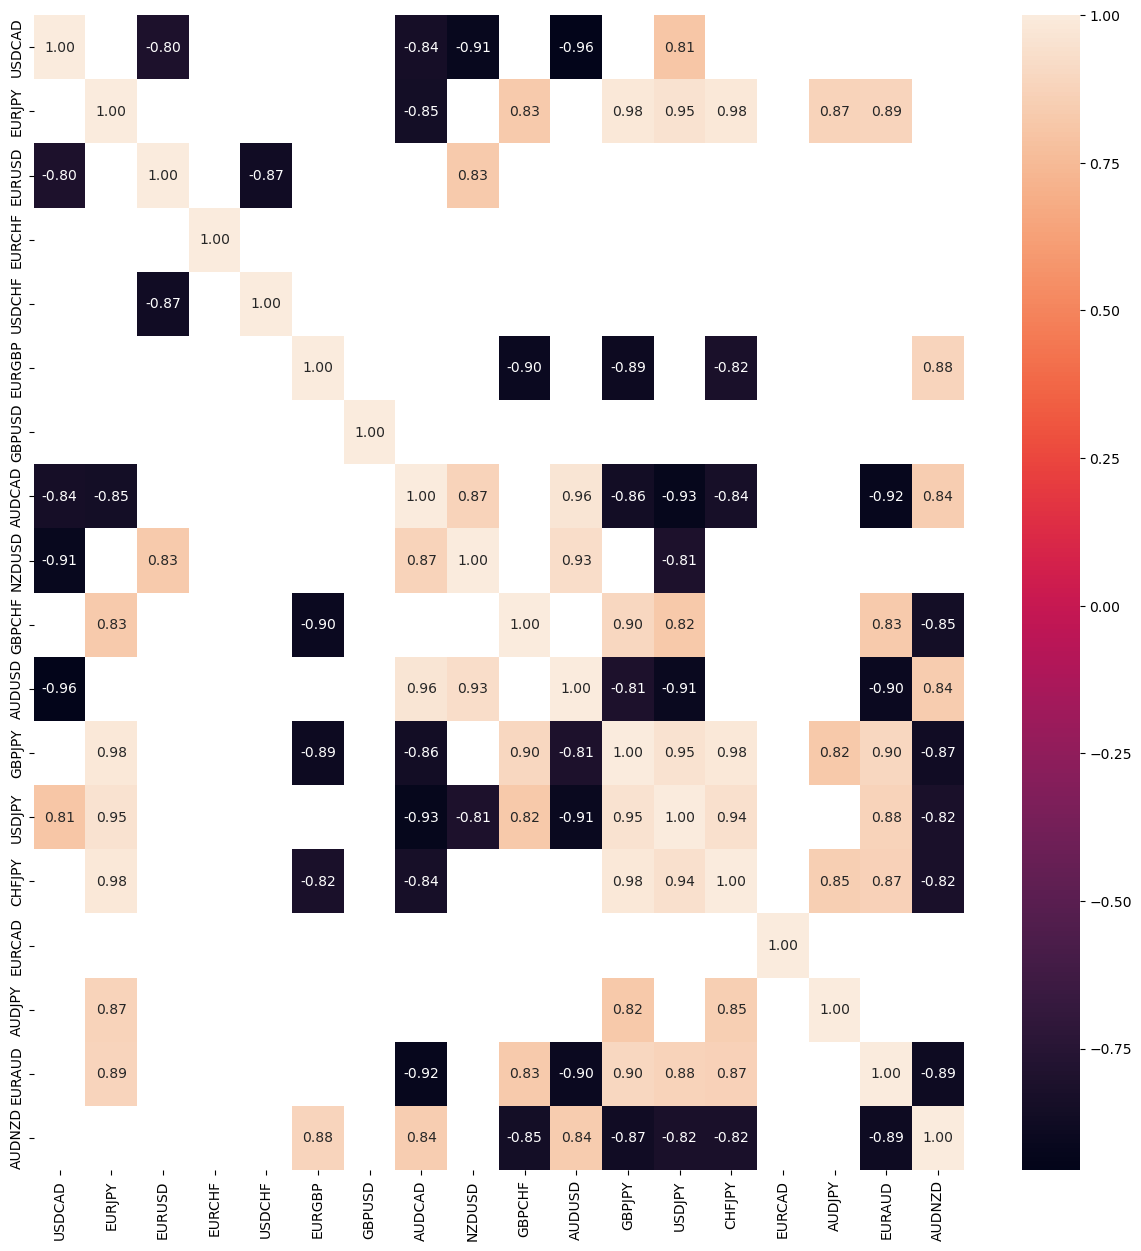

In [59]:
figure = plt.figure(figsize=(15,15))
sns.heatmap(corr_df[(corr_df>0.80) | (corr_df<-0.80)],annot=True,fmt=("0.2f") )